# Import 

In [11]:
import pandas as pd
import seaborn as sns
import boto3
import os
import matplotlib.pyplot as plt

# Load Data

In [3]:
try :
    from config import AWS_ACCESS_KEY_ID, AWS_SECRET_ACCESS_KEY
except:
    AWS_ACCESS_KEY_ID = os.environ.get("AWS_ACCESS_KEY_ID")
    AWS_SECRET_ACCESS_KEY = os.environ.get("AWS_SECRET_ACCESS_KEY")

In [5]:

s3_bucket = "datarunning"
s3_key_id = "strava_id.csv"
s3_key_activities = "strava.csv"
s3_key_lap = "strava_laps.csv"

s3 = boto3.client(
    "s3",
    aws_access_key_id=AWS_ACCESS_KEY_ID,
    aws_secret_access_key=AWS_SECRET_ACCESS_KEY,
)



In [6]:
response = s3.get_object(Bucket=s3_bucket, Key=s3_key_activities)
df_act = pd.read_csv(response['Body'])
    
response = s3.get_object(Bucket=s3_bucket, Key=s3_key_lap)
df_lap = pd.read_csv(response['Body'])

In [9]:
df_act.columns

Index(['id', 'athlete', 'name', 'type', 'start_date_local', 'distance',
       'moving_time', 'total_elevation_gain', 'sport_type', 'workout_type',
       'start_date_local.1', 'timezone', 'utc_offset', 'achievement_count',
       'kudos_count', 'comment_count', 'average_speed', 'max_speed',
       'average_cadence', 'average_watts', 'max_watts',
       'weighted_average_watts', 'kilojoules', 'device_watts', 'has_heartrate',
       'average_heartrate', 'max_heartrate', 'elev_high', 'elev_low',
       'upload_id_str', 'external_id', 'pr_count', 'total_photo_count',
       'suffer_score', 'numero_semaine_prepa', 'numero_seance_semaine',
       'type_seance', 'prepa_name', 'average_pace', 'moving_time_minute',
       'moving_time_hour'],
      dtype='object')

In [8]:
df_lap

,id,activity,athlete,lap_index,split,start_index,end_index,moving_time,start_date_local,distance,average_speed,max_speed,total_elevation_gain,average_cadence,average_watts,average_heartrate,max_heartrate,pace_zone
0,36999975620,10692823418,98364076,1,1,0,261,373,2024-02-04T09:29:49Z,1000.00,2.68,4.824,16.8,86.5,387.4,148.0,163.0,1.0
1,36999975632,10692823418,98364076,2,2,262,638,376,2024-02-04T09:36:04Z,1000.00,2.66,3.236,4.2,86.8,355.6,151.4,156.0,1.0
2,36999975642,10692823418,98364076,3,3,639,1011,373,2024-02-04T09:42:21Z,1000.00,2.68,3.158,2.2,86.6,351.9,148.9,153.0,1.0
3,36999975651,10692823418,98364076,4,4,1012,1378,366,2024-02-04T09:48:34Z,1000.00,2.73,3.390,0.0,86.4,357.9,151.6,156.0,2.0
4,36999975665,10692823418,98364076,5,5,1379,1688,310,2024-02-04T09:54:41Z,842.23,2.72,3.370,0.0,85.8,365.5,153.9,158.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5145,21675850469,6609742733,98364076,2,2,210,235,227,2021-11-04T18:30:14Z,3.16,0.01,0.418,0.0,0.0,NaN,NaN,NaN,NaN
5146,21675850777,6609742819,98364076,1,1,0,172,870,2021-11-04T08:36:11Z,963.11,1.11,3.354,13.6,61.5,NaN,NaN,NaN,NaN
5147,21675851986,6609743168,98364076,1,1,0,248,907,2021-11-03T18:42:43Z,767.92,0.85,3.317,0.0,56.4,NaN,NaN,NaN,NaN
5148,21675850745,6609742811,98364076,1,1,0,185,713,2021-11-03T08:33:08Z,1000.00,1.40,3.076,21.0,60.0,NaN,NaN,NaN,NaN


# Analysis

<Axes: xlabel='distance', ylabel='moving_time'>

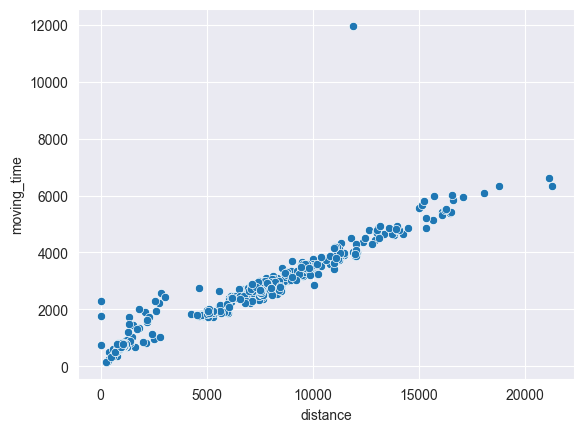

In [10]:
sns.scatterplot(
    data=df_act,
    x='distance',
    y='moving_time'
)

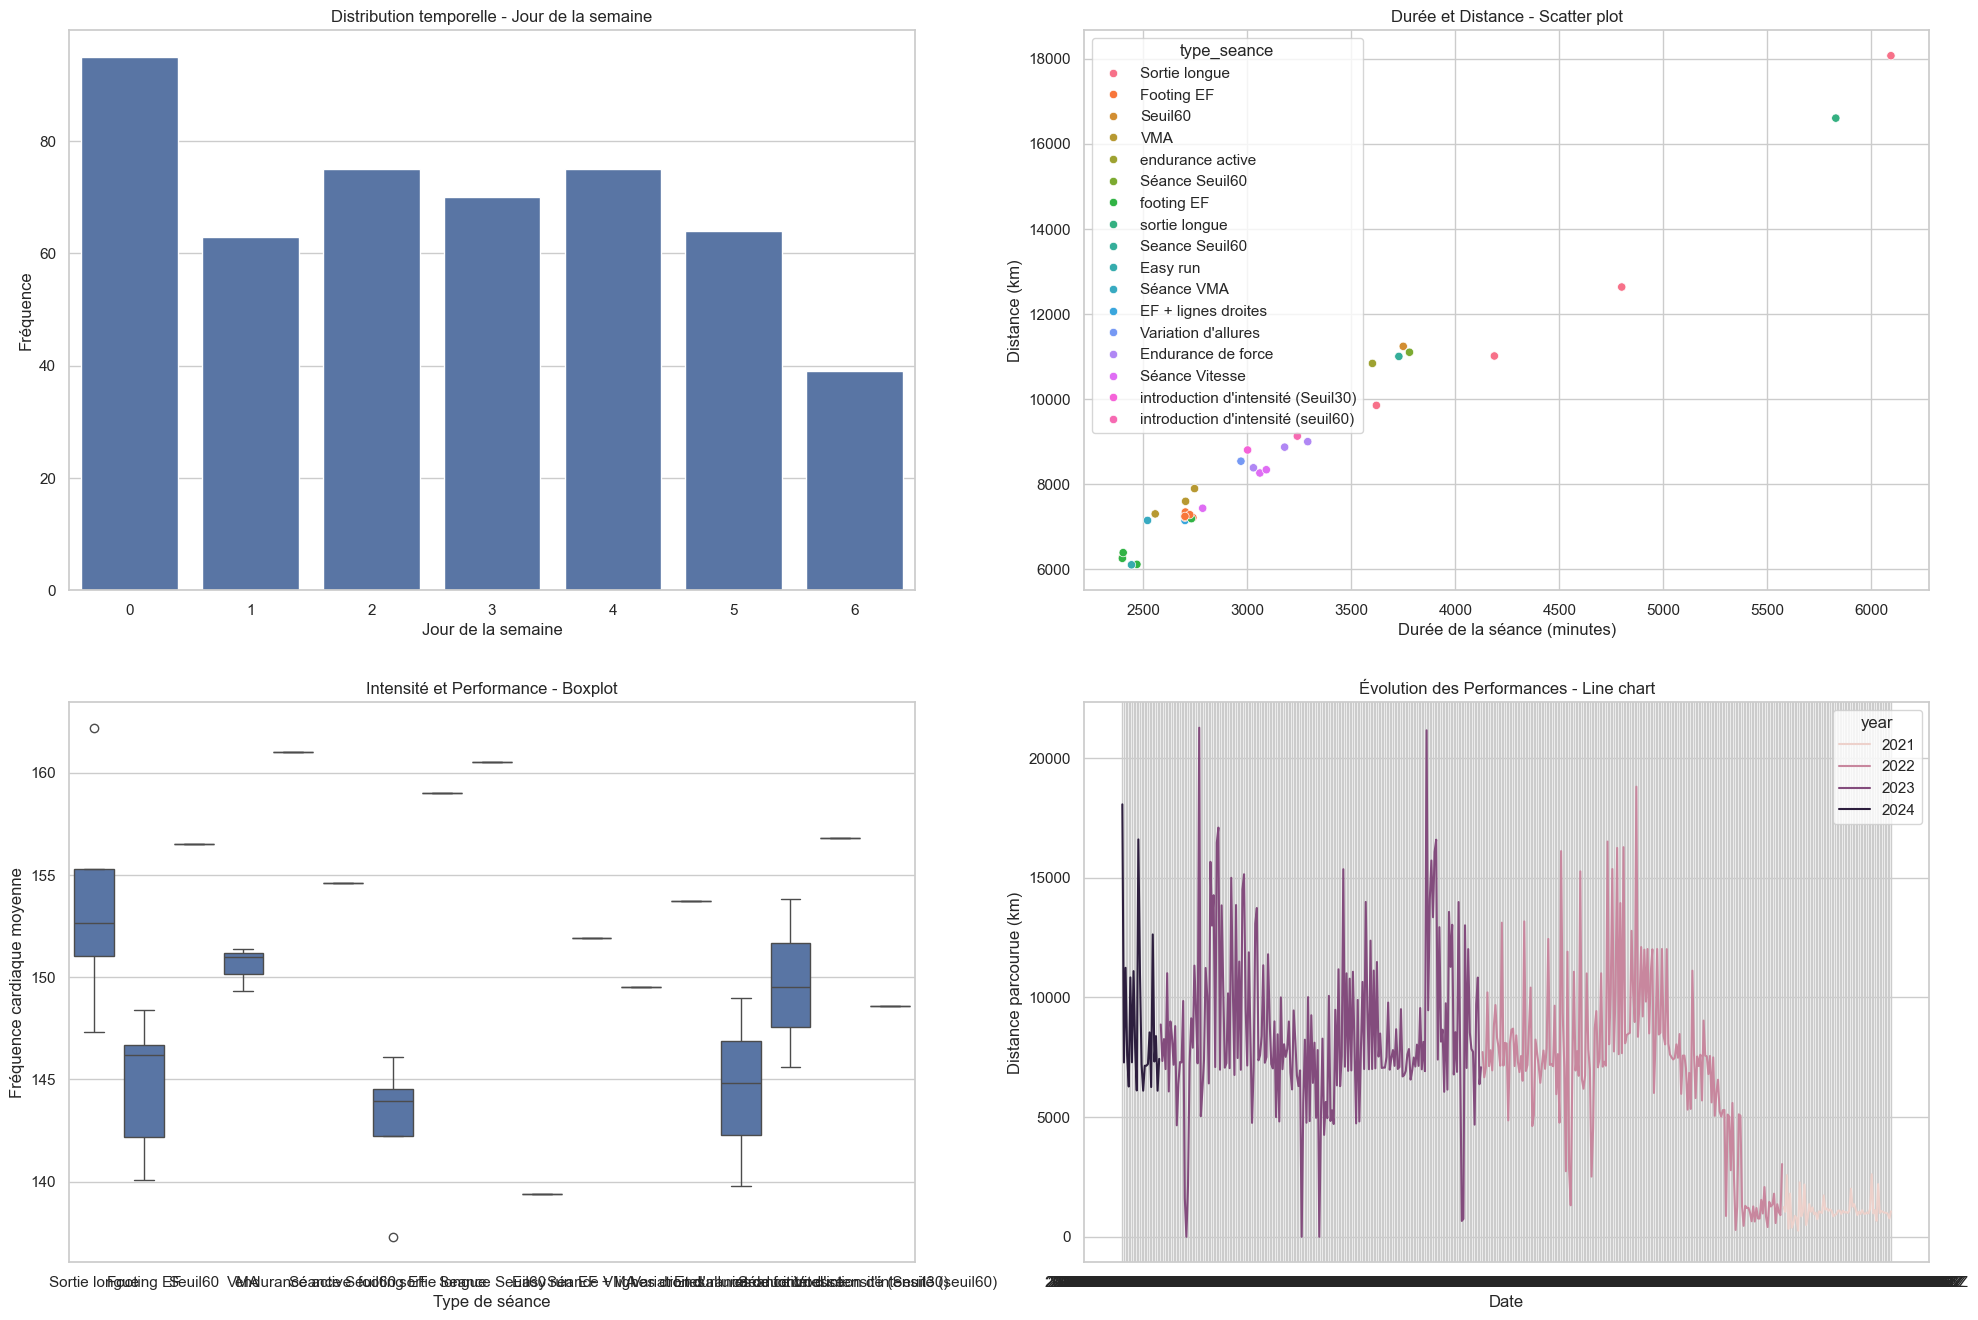

In [15]:
# Configuration pour améliorer l'apparence des graphes
sns.set(style="whitegrid")
plt.figure(figsize=(24, 16))

# Distribution temporelle - Histogramme de la fréquence des séances par jour de la semaine
plt.subplot(2, 2, 1)
sns.countplot(x=pd.to_datetime(df_act['start_date_local']).dt.dayofweek)
plt.xlabel('Jour de la semaine')
plt.ylabel('Fréquence')
plt.title('Distribution temporelle - Jour de la semaine')

# Durée et Distance - Scatter plot de distance par moving_time
plt.subplot(2, 2, 2)
sns.scatterplot(x='moving_time', y='distance', data=df_act, hue='type_seance')
plt.xlabel('Durée de la séance (minutes)')
plt.ylabel('Distance (km)')
plt.title('Durée et Distance - Scatter plot')

# Intensité et Performance - Boxplot de average_heartrate en fonction du type de séance
plt.subplot(2, 2, 3)
sns.boxplot(x='type_seance', y='average_heartrate', data=df_act)
plt.xlabel('Type de séance')
plt.ylabel('Fréquence cardiaque moyenne')
plt.title('Intensité et Performance - Boxplot')

# Évolution des Performances - Line chart de l'évolution de la distance parcourue au fil du temps
plt.subplot(2, 2, 4)
df_act['year'] = pd.to_datetime(df_act['start_date_local']).dt.year
sns.lineplot(x='start_date_local', y='distance', hue='year', data=df_act)
plt.xlabel('Date')
plt.ylabel('Distance parcourue (km)')
plt.title('Évolution des Performances - Line chart')


# Afficher les graphiques
plt.show()

[]

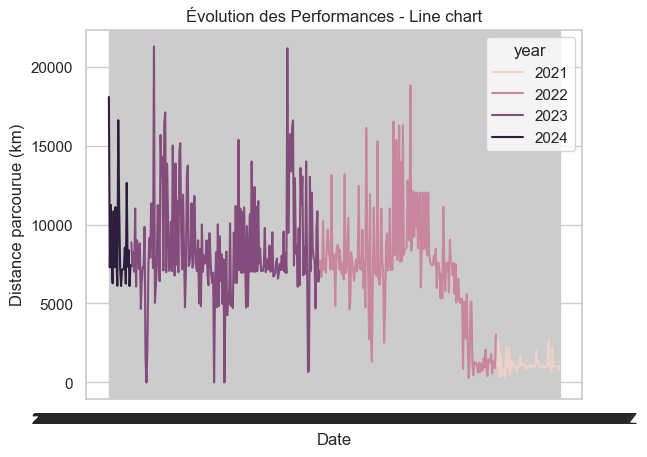

In [16]:
df_act['year'] = pd.to_datetime(df_act['start_date_local']).dt.year
sns.lineplot(x='start_date_local', y='distance', hue='year', data=df_act)
plt.xlabel('Date')
plt.ylabel('Distance parcourue (km)')
plt.title('Évolution des Performances - Line chart')

plt.plot()